In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor

In [37]:
file1 = "/content/drive/MyDrive/Mestrado/Mineracao/Projeto/wine+quality/wine_red_alterado.csv"

# column_names  = [
#     'fixed acidity',
#     'volatile acidity',
#     'citric acid',
#     'residual sugar',
#     'chlorides',
#     'free sulfur dioxide',
#     'total sulfur dioxide',
#     'density',
#     'pH',
#     'sulphates',
#     'alcohol',
#     'quality'
# ]


data_red = pd.read_csv(file1)
print (data_red.head(10))
# print (df1.info)
# print(df1.dtypes)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.269231          0.397260     0.000000        0.272727   0.066318   
1       0.307692          0.520548     0.000000        0.909091   0.104712   
2       0.307692          0.438356     0.052632        0.636364   0.094241   
3       0.634615          0.109589     0.736842        0.272727   0.064572   
4       0.269231          0.397260     0.000000        0.272727   0.066318   
5       0.269231          0.369863     0.000000        0.181818   0.064572   
6       0.317308          0.328767     0.078947        0.000000   0.054101   
7       0.307692          0.315068     0.026316        0.363636   0.061082   
8       0.201923          0.315068     0.105263        0.181818   0.102967   
9       0.096154          0.339041     0.000000        0.000000   0.089005   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0                 0.40              0.388889  0.685039  0.6250

In [38]:
file2 = "/content/drive/MyDrive/Mestrado/Mineracao/Projeto/wine+quality/wine_white_alterado.csv"

# column_names  = [
#     'fixed acidity',
#     'volatile acidity',
#     'citric acid',
#     'residual sugar',
#     'chlorides',
#     'free sulfur dioxide',
#     'total sulfur dioxide',
#     'density',
#     'pH',
#     'sulphates',
#     'alcohol',
#     'quality'
# ]


data_white = pd.read_csv(file2)
print (data_white.head(10))
print (data_white.dtypes)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.240385          0.215686     0.204819        0.071942   0.133094   
1       0.413462          0.196078     0.240964        0.453237   0.136691   
2       0.326923          0.147059     0.192771        0.568345   0.165468   
3       0.326923          0.147059     0.192771        0.568345   0.165468   
4       0.413462          0.196078     0.240964        0.453237   0.136691   
5       0.230769          0.235294     0.096386        0.460432   0.118705   
6       0.240385          0.215686     0.204819        0.071942   0.133094   
7       0.413462          0.137255     0.259036        0.064748   0.115108   
8       0.413462          0.186275     0.246988        0.061151   0.075540   
9       0.461538          0.147059     0.240964        0.258993   0.082734   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.156863              0.514706  0.510749  0.5272

In [46]:
X_red = data_red.drop(['quality'], axis=1)
y_red = data_red['quality']

X_white = data_white.drop(['quality'], axis=1)
y_white = data_white['quality']


# ⚫⚪ Modelos Hibridos

Com o objetivo complementar a analise realizada, foi proposto o adicionamento de modelos de regressão hibridos para teste e treimento, em busca de resultados melhores que os modelos puros

Os modelos são:

Aqui estão algumas combinações que usaremos:

Random Forest + Gradient Boosting (meta: Linear Regression)

Random Forest + Gradient Boosting (meta: Ridge Regression)

Random Forest + AdaBoost (meta: Linear Regression)

Gradient Boosting + AdaBoost (meta: Ridge Regression)

In [47]:
# Definir modelos híbridos
models = {
    "Random Forest + Gradient Boosting (meta: Linear Regression)": StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
        ],
        final_estimator=LinearRegression()
    ),
    "Random Forest + Gradient Boosting (meta: Ridge Regression)": StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
        ],
        final_estimator=Ridge()
    ),
    "Random Forest + AdaBoost (meta: Linear Regression)": StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('ada', AdaBoostRegressor(n_estimators=100, random_state=42))
        ],
        final_estimator=LinearRegression()
    ),
    "Gradient Boosting + AdaBoost (meta: Ridge Regression)": StackingRegressor(
        estimators=[
            ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
            ('ada', AdaBoostRegressor(n_estimators=100, random_state=42))
        ],
        final_estimator=Ridge()
    )
}

# Avaliar cada modelo em vinhos tintos e brancos
results = {"Model": [], "Wine Type": [], "MSE": [], "MAE": [], "R2": [], "Time": []}

In [48]:
# Dividir dados de treino e teste para cada tipo
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)



In [49]:
from time import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):

    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time

    # Previsão e cálculo das métricas
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Time': train_time
    }


In [50]:
for model_name, model in models.items():
    # Vinhos Tintos
    red_metrics = evaluate_model(model, X_train_red, X_test_red, y_train_red, y_test_red)
    results["Model"].append(model_name)
    results["Wine Type"].append("Red")
    results["MSE"].append(red_metrics['MSE'])
    results["MAE"].append(red_metrics['MAE'])
    results["R2"].append(red_metrics['R2'])
    results["Time"].append(red_metrics['Time'])

    # Vinhos Brancos
    white_metrics = evaluate_model(model, X_train_white, X_test_white, y_train_white, y_test_white)
    results["Model"].append(model_name)
    results["Wine Type"].append("White")
    results["MSE"].append(white_metrics['MSE'])
    results["MAE"].append(white_metrics['MAE'])
    results["R2"].append(white_metrics['R2'])
    results["Time"].append(white_metrics['Time'])

##Resultados

In [44]:
# Converter resultados para um DataFrame
results_df = pd.DataFrame(results)
print(results_df)

             Model Wine Type       MSE       MAE        R2       Time
0  Stacked Model 1       Red  0.014646  0.090945  0.461022   3.980490
1  Stacked Model 1     White  0.012578  0.079236  0.460960  13.361454
2  Stacked Model 2       Red  0.014936  0.094623  0.450322   3.430535
3  Stacked Model 2     White  0.012657  0.081220  0.457584  13.326817
4  Stacked Model 3       Red  0.014711  0.090439  0.458634   3.658929
5  Stacked Model 3     White  0.012577  0.079201  0.461015  13.982182
6  Stacked Model 4       Red  0.015932  0.100660  0.413699   3.068662
7  Stacked Model 4     White  0.014805  0.094994  0.365542   6.474205


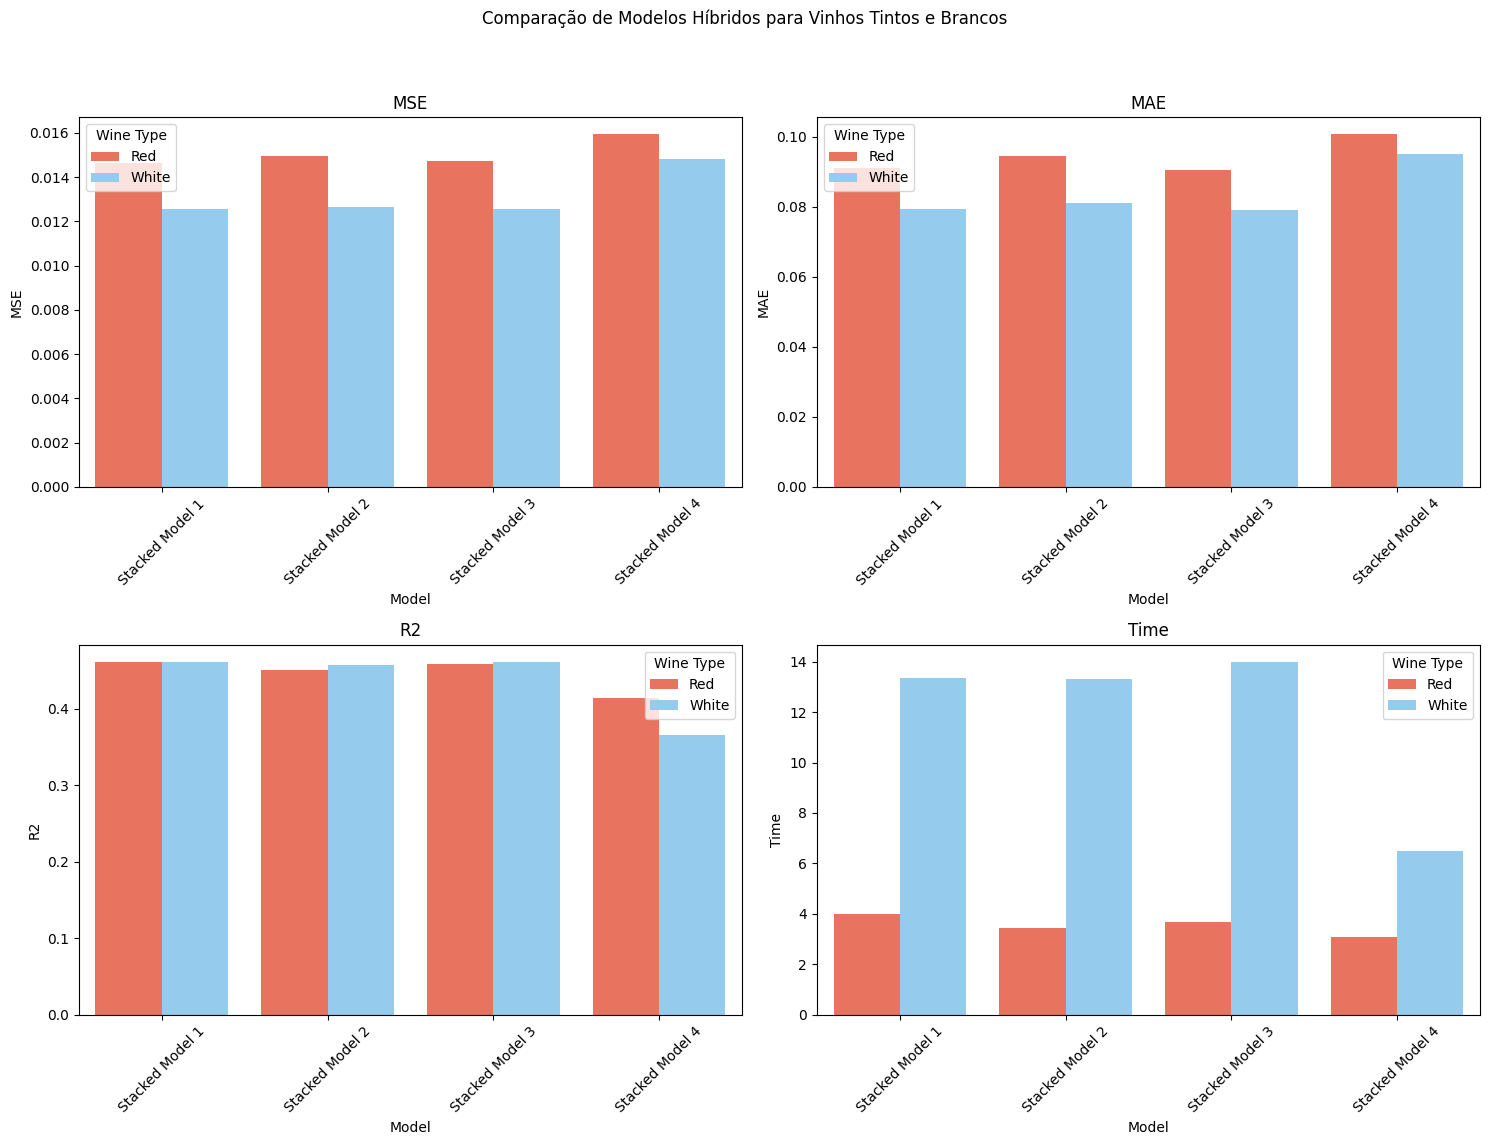

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar gráficos para MSE, MAE, R2 e Tempo
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Comparação de Modelos Híbridos para Vinhos Tintos e Brancos")

metrics = ["MSE", "MAE", "R2", "Time"]
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    sns.barplot(data=results_df, x="Model", y=metric, hue="Wine Type", ax=ax, palette=["#FF6347", "#87CEFA"])
    ax.set_title(metric)
    ax.set_xlabel("Model")
    ax.set_ylabel(metric)
    ax.legend(title="Wine Type")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 🏁 Comparação Final dos resultados e conclusão

os resultados obtidos foram:

## Aplicação dos algoritmos puros:
**Resultados para df1:**

| Modelo              |    MSE     |    MAE     |    R²     |  Tempo (s) |
|---------------------|------------|------------|-----------|------------|
| Linear Regression   | 0.015127   | 0.099742   | 0.471607  | 0.036982   |
| SVR                 | 0.015227   | 0.100440   | 0.468109  | 0.071032   |
| Random Forest       | 0.013461   | 0.084473   | 0.529821  | 0.518728   |
| Gradient Boosting   | 0.015179   | 0.095235   | 0.469785  | 0.222424   |

---

**Resultados para df2:**

| Modelo              |    MSE     |    MAE     |    R²     |  Tempo (s) |
|---------------------|------------|------------|-----------|------------|
| Linear Regression   | 0.016421   | 0.101326   | 0.303542  | 0.006713   |
| SVR                 | 0.014714   | 0.096663   | 0.375961  | 0.392594   |
| Random Forest       | 0.011536   | 0.076035   | 0.510738  | 2.027817   |
| Gradient Boosting   | 0.014849   | 0.094340   | 0.370217  | 0.626956   |

## COM TUNING

**Resultados após tunagem para df1:**

| Modelo             | Melhor Modelo                                                 |    MSE     |    MAE     |    R²     |   Tempo (s) |
|--------------------|---------------------------------------------------------------|------------|------------|-----------|-------------|
| SVR                | SVR(C=10, kernel='linear')                                    | 0.015443   | 0.101737   | 0.460562  | 3.032590    |
| Random Forest      | DecisionTreeRegressor(max_features=1.0, random_state=42)       | 0.013358   | 0.084333   | 0.533409  | 12.062052   |
| Gradient Boosting  | DecisionTreeRegressor(criterion='friedman_mse')                | 0.015194   | 0.099294   | 0.469265  | 22.042699   |

---

**Resultados após tunagem para df2:**

| Modelo             | Melhor Modelo                                                 |    MSE     |    MAE     |    R²     |   Tempo (s) |
|--------------------|---------------------------------------------------------------|------------|------------|-----------|-------------|
| SVR                | SVR(C=1)                                                      | 0.014714   | 0.096663   | 0.375961  | 10.095348   |
| Random Forest      | DecisionTreeRegressor(max_features=1.0, random_state=42)       | 0.011468   | 0.075741   | 0.513625  | 41.716616   |
| Gradient Boosting  | DecisionTreeRegressor(criterion='friedman_mse')                | 0.011551   | 0.074339   | 0.510099  | 64.207976   |

##Com Cross-Validation

**Resultados para Vinhos Tintos:**

| Modelo              | MSE           | MAE           | R²            | Tempo (s)    |
|---------------------|---------------|---------------|---------------|--------------|
| Linear Regression   | 0.015127      | 0.099742      | 0.471607      | 0.003212     |
| SVR                 | 0.014842      | 0.095313      | 0.481579      | 0.072047     |
| Random Forest       | 0.013498      | 0.084495      | 0.528524      | 0.855595     |
| Gradient Boosting   | 0.015037      | 0.094842      | 0.474761      | 0.430642     |

---

**Resultados para Vinhos Brancos:**

| Modelo              | MSE           | MAE           | R²            | Tempo (s)    |
|---------------------|---------------|---------------|---------------|--------------|
| Linear Regression   | 0.016421      | 0.101326      | 0.303542      | 0.002931     |
| SVR                 | 0.014287      | 0.093991      | 0.394056      | 0.879670     |
| Random Forest       | 0.011528      | 0.076149      | 0.511091      | 3.132886     |
| Gradient Boosting   | 0.014840      | 0.094284      | 0.370607      | 0.634997     |

---

**Resultados para Modelos Hibridos**

| Model            | Wine Type |    MSE     |    MAE     |    R²     |  Time (s)   |
|------------------|-----------|------------|------------|-----------|-------------|
| Stacked Model 1  | Red       | 0.014646   | 0.090945   | 0.461022  | 3.980490    |
| Stacked Model 1  | White     | 0.012578   | 0.079236   | 0.460960  | 13.361454   |
| Stacked Model 2  | Red       | 0.014936   | 0.094623   | 0.450322  | 3.430535    |
| Stacked Model 2  | White     | 0.012657   | 0.081220   | 0.457584  | 13.326817   |
| Stacked Model 3  | Red       | 0.014711   | 0.090439   | 0.458634  | 3.658929    |
| Stacked Model 3  | White     | 0.012577   | 0.079201   | 0.461015  | 13.982182   |
| Stacked Model 4  | Red       | 0.015932   | 0.100660   | 0.413699  | 3.068662    |
| Stacked Model 4  | White     | 0.014805   | 0.094994   | 0.365542  | 6.474205    |



#🏁 **Comparação Final dos Resultados e Conclusão**

Na análise dos modelos **Regressão Linear**, **SVR**, **Random Forest**, **Gradient Boosting** e **modelos híbridos (stacking)**, com base nas métricas **MSE**, **MAE**, **R²** e **Tempo de Execução**, observamos o desempenho em duas bases de dados de tamanhos distintos:

- **df1:** conjunto menor, com **1600 instâncias**;
- **df2:** conjunto maior, com **4899 instâncias**.

### Comparação dos Resultados

#### Modelos Padrões sem Tunagem

- No **df1**, **Random Forest** e **Gradient Boosting** alcançaram melhores resultados em MSE e R² em relação à **Regressão Linear** e ao **SVR**, mas com maior custo computacional.
- No **df2**, **Random Forest** novamente se destacou em precisão, com um tempo de execução bem maior, seguido pelo **Gradient Boosting**.

#### Modelos com Tunagem

A tunagem permitiu melhorias significativas para todos os modelos, com **Random Forest** e **Gradient Boosting** apresentando melhor desempenho em precisão em ambos os conjuntos de dados, mas com aumentos expressivos nos tempos de execução, especialmente para o **Random Forest** no df2.

#### Resultados com Cross-Validation

Com **Cross-Validation**, **Random Forest** e **Gradient Boosting** continuaram com valores superiores de precisão. Embora o custo computacional tenha sido otimizado, ainda foi consideravelmente maior que o da **Regressão Linear**.

#### Modelos Híbridos (Stacking)

A introdução de modelos híbridos de empilhamento (*stacked models*) buscou melhorar a robustez e a precisão combinando modelos base:

- **Stacked Model 1** e **Stacked Model 3** apresentaram os melhores valores de MSE e R² para ambos os tipos de vinho, mantendo-se entre os modelos com melhores resultados de precisão, especialmente em relação ao **MSE** e **MAE**.
- Comparado aos modelos individuais, os modelos híbridos mostraram-se competitivos e com menor custo computacional que o **Random Forest** no conjunto maior (**df2**), com tempos de execução entre **3 a 13 segundos**, tornando-os opções de precisão e desempenho relativamente equilibrados.
- **Stacked Model 4** obteve o menor desempenho, especialmente em vinhos brancos, com menor R² e um MSE mais alto em comparação aos outros modelos híbridos.

### Conclusão

1. **Modelo de Melhor Desempenho:** Entre os modelos testados, **Random Forest** permaneceu como o modelo com maior precisão em termos de MSE e R², tanto para df1 quanto df2. No entanto, os **modelos híbridos Stacked Model 1 e 3** destacaram-se por oferecer um desempenho competitivo com menor custo computacional.

2. **Impacto do Tamanho da Base:** O tempo de execução aumentou substancialmente para **Random Forest** e **Gradient Boosting** com o aumento do tamanho do conjunto de dados. Os modelos híbridos mantiveram uma relação de custo-benefício mais vantajosa no conjunto maior.

3. **Custo Computacional:** **Regressão Linear** continua como a opção mais rápida, enquanto **Random Forest** apresenta o maior custo computacional. Os modelos híbridos proporcionaram um equilíbrio entre desempenho e custo, adequados para cenários que demandam boa precisão sem sacrificar tanto o tempo de execução.

4. **Recomendação Final:** Para precisão máxima em ambas as bases, **Random Forest** com tunagem é o modelo recomendado. No entanto, para um compromisso entre precisão e tempo de execução, **Stacked Model 1** e **Stacked Model 3** são opções muito viáveis, especialmente em contextos com grandes volumes de dados.

Essa análise fornece uma base sólida para escolher o modelo mais adequado conforme o contexto, considerando a precisão e o custo computacional conforme o tamanho dos dados e as restrições de processamento.